Dataset Shape: (442, 11)
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Best SVR Parameters: {'svr__C': 1, 'svr__epsilon': 0.2, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
SVR Cross-Validation R2 Scores: [0.5352741  0.41877379 0.49481471 0.58455059 0.27832927]

Model Comparison:

                         MAE       RMSE        R2
Linear Re

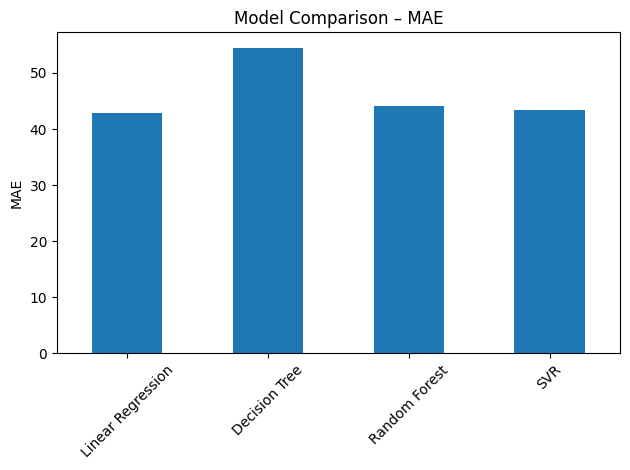

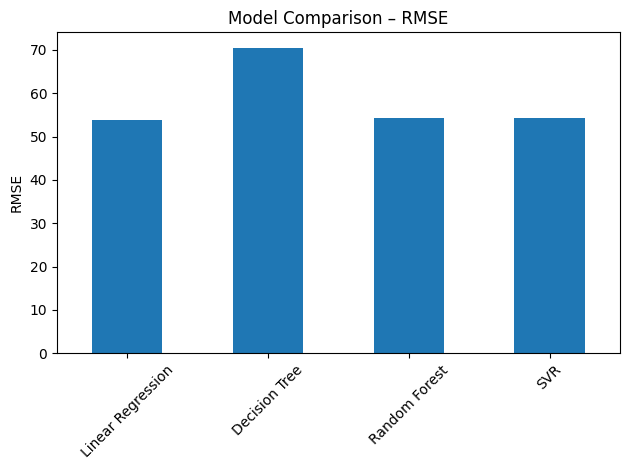

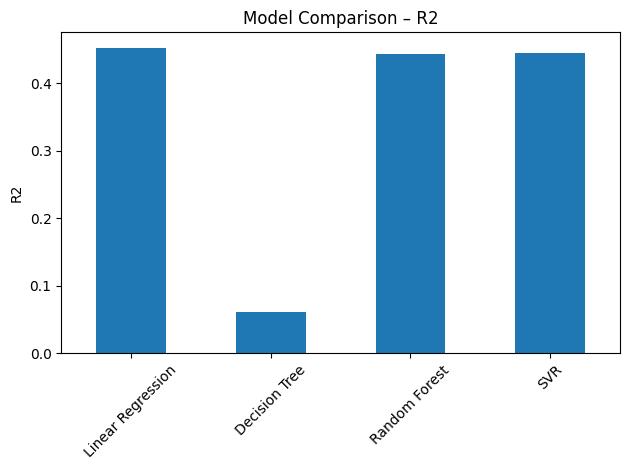

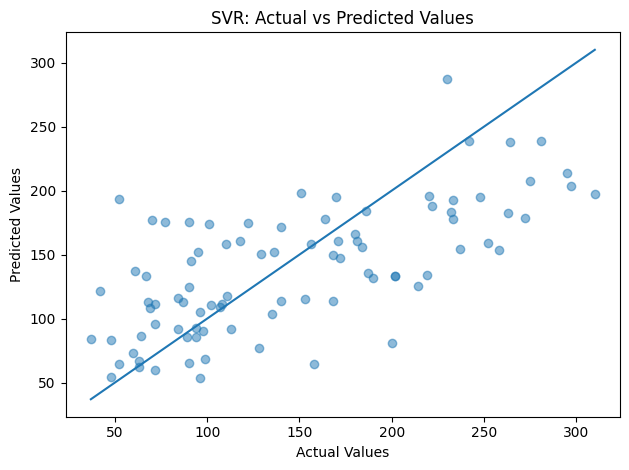

In [2]:
#  Full Machine Learning Pipeline with SVR and Model Comparison
# ---------------------------------------------------------------
# This script demonstrates a COMPLETE ML pipeline:
# 1. Data loading
# 2. Exploratory Data Analysis (EDA)
# 3. Data preprocessing (scaling, splitting)
# 4. Model training
# 5. Model evaluation using multiple metrics
# 6. Model comparison with plots



# ---------------------------------------------------------------
# 1. Import Required Libraries
# ---------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------------------------------------------------------------
# 2. Load Dataset
# ---------------------------------------------------------------
# OPTION A: Use a built-in dataset that does NOT require internet access
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True)
df = data.frame

X = df.drop(columns='target')
y = df['target']

print("Dataset Shape:", df.shape)
print(df.head())

# NOTE:

# df = pd.read_csv('your_dataset.csv')
# X = df.drop(columns='target_column_name')
# y = df['target_column_name']

# ---------------------------------------------------------------
# 3. Train-Test Split
# ---------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------------------------------------------
# 4. Evaluation Function
# ---------------------------------------------------------------
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

# ---------------------------------------------------------------
# 5. Models
# ---------------------------------------------------------------
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_test, y_test)

# ---------------------------------------------------------------
# 6. Support Vector Regressor (SVR) with Pipeline
# ---------------------------------------------------------------
# SVR is sensitive to feature scaling, so we use a pipeline

svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'svr__kernel': ['rbf', 'linear'],
    'svr__C': [1, 10, 100],
    'svr__gamma': ['scale', 'auto'],
    'svr__epsilon': [0.1, 0.2]
}

grid_search = GridSearchCV(
    svr_pipeline,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_svr = grid_search.best_estimator_
print("Best SVR Parameters:", grid_search.best_params_)

# Cross-validation score
cv_scores = cross_val_score(best_svr, X_train, y_train, cv=5, scoring='r2')
print("SVR Cross-Validation R2 Scores:", cv_scores)

# Final evaluation on test set
results['SVR'] = evaluate_model(best_svr, X_test, y_test)

# ---------------------------------------------------------------
# 7. Results Comparison Table
# ---------------------------------------------------------------
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n")
print(results_df)

# ---------------------------------------------------------------
# 8. Visualization – Model Performance Comparison
# ---------------------------------------------------------------
metrics = ['MAE', 'RMSE', 'R2']

for metric in metrics:
    plt.figure()
    results_df[metric].plot(kind='bar')
    plt.title(f'Model Comparison – {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------------
# 9. Actual vs Predicted Plot for Best Model (SVR)
# ---------------------------------------------------------------
y_pred_svr = best_svr.predict(X_test)

plt.figure()
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# End of Script
# ---------------------------------------------------------------
